<a href="https://colab.research.google.com/github/RJuro/aqm2021/blob/main/AQM_Q%26A_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

## Chi-Square Test (question)

we use this test to compare observed results with expected results.
Is the difference between observed data and expected data  due to chance, or if it is due to a relationship between the variables we are studying?

In [ ]:
df = pd.DataFrame({'Sex' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker'] * 10
                  })

In [ ]:
df.head()

In [6]:
contingency = pd.crosstab(df['Sex'], df['isSmoker'])
contingency

isSmoker,Non-Smoker,Smoker
Sex,,
F,10,10
M,10,20


In [7]:
contingency_pct = pd.crosstab(df['Sex'], df['isSmoker'], normalize='index')
contingency_pct

isSmoker,Non-Smoker,Smoker
Sex,,
F,0.500000,0.500000
M,0.333333,0.666667


In [8]:
from scipy.stats import chi2_contingency

In [9]:
c, p, dof, expected = chi2_contingency(contingency)

The 0-hypothesis is that smoking and sex are independent. 

In [10]:
# expected values if distribution were to follow the whole population (male & female)
pd.DataFrame(expected)

,0,1
0,8.0,12.0
1,12.0,18.0


In [12]:
contingency.sum()/50

isSmoker
Non-Smoker    0.4
Smoker        0.6
dtype: float64

In [13]:
print(p)

0.3767591178115821


with this p-value we can NOT reject the 0-hypothesis at a 95% level of confidence

## From question: Missing data

In [14]:
df = pd.read_csv("https://www.ssc.wisc.edu/~bhansen/econometrics/AK1991.txt", sep="\t")

In [15]:
df_nan = df.sample(25)

In [16]:
df_nan

,ageq,edu,logwage,married,state,qob,black,smsa,yob,region
171361,43.50,12,5.751045,1,55,3,0,1,1936,1
59377,46.75,16,6.827817,1,34,2,0,1,1933,6
169906,42.25,19,6.241363,1,55,4,0,1,1937,1
185738,41.75,9,5.615530,1,39,2,0,1,1938,1
307100,42.00,11,5.790019,1,21,1,0,0,1938,2
37710,49.50,12,6.252533,1,42,3,0,1,1930,3
81894,45.50,14,6.001748,1,40,3,0,1,1934,0
293067,42.25,15,6.278365,1,5,4,0,1,1937,1
122348,40.25,15,6.001272,1,48,4,0,1,1939,8
187864,45.00,8,5.790019,1,39,1,0,0,1935,1


Let's simulate some missing values

In [17]:
import random

rand1 = random.sample(list(df_nan.index), 7)
rand2 = random.sample(list(df_nan.index), 3)

In [18]:
df_nan.loc[rand1,'edu'] = np.nan

In [19]:
df_nan.loc[rand2,'region'] = np.nan

In [20]:
df_nan

,ageq,edu,logwage,married,state,qob,black,smsa,yob,region
171361,43.50,12.0,5.751045,1,55,3,0,1,1936,1.0
59377,46.75,16.0,6.827817,1,34,2,0,1,1933,6.0
169906,42.25,19.0,6.241363,1,55,4,0,1,1937,NaN
185738,41.75,9.0,5.615530,1,39,2,0,1,1938,1.0
307100,42.00,NaN,5.790019,1,21,1,0,0,1938,2.0
37710,49.50,NaN,6.252533,1,42,3,0,1,1930,3.0
81894,45.50,NaN,6.001748,1,40,3,0,1,1934,0.0
293067,42.25,15.0,6.278365,1,5,4,0,1,1937,1.0
122348,40.25,NaN,6.001272,1,48,4,0,1,1939,8.0
187864,45.00,NaN,5.790019,1,39,1,0,0,1935,1.0


In [21]:
# option1: drop

print(len(df_nan.dropna()))
df_nan.dropna()

15


,ageq,edu,logwage,married,state,qob,black,smsa,yob,region
171361,43.50,12.0,5.751045,1,55,3,0,1,1936,1.0
59377,46.75,16.0,6.827817,1,34,2,0,1,1933,6.0
185738,41.75,9.0,5.615530,1,39,2,0,1,1938,1.0
293067,42.25,15.0,6.278365,1,5,4,0,1,1937,1.0
270432,48.00,15.0,6.645516,1,22,1,0,1,1932,8.0
15209,40.25,15.0,5.298817,0,37,4,1,0,1939,6.0
265402,47.50,11.0,5.952494,1,5,3,0,0,1932,4.0
237754,45.00,19.0,5.955489,1,1,1,0,1,1935,2.0
16221,43.75,11.0,5.918428,1,37,2,1,1,1936,3.0
33507,41.75,12.0,6.047781,1,42,2,0,1,1938,3.0


In [ ]:
# option 1: fill

mean_of_edu = round(df_nan['edu'].mean())
df_nan['edu'].fillna(mean_of_edu)

# df_nan['edu'] = df_nan['edu'].fillna(mean_of_edu)

In [ ]:
df_nan['region'].mode()

In [ ]:
mode_of_region = df_nan['region'].mode()[0]
df_nan['region'].fillna(mode_of_region)

In [29]:
# Overkill option: Predict what would have been there probably... AKA Impute

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)

In [30]:
df_nan_imp = df_nan.copy()

In [31]:
df_nan_imp.iloc[:,:] = imputer.fit_transform(df_nan)

In [ ]:
df_nan_imp

In [ ]:
df_nan_imp['edu']

In [ ]:
round(df_nan_imp['edu'])

## Example to clarify several questions

In [34]:
# Importing the data.
df = pd.read_csv("https://www.ssc.wisc.edu/~bhansen/econometrics/AK1991.txt", sep="\t")

In [35]:
# Inspect the data:
df.head()

,ageq,edu,logwage,married,state,qob,black,smsa,yob,region
0,47.00,12,6.245846,1,1,1,1,1,1933,0
1,46.25,12,5.847161,1,48,4,1,1,1933,0
2,50.00,12,6.645516,1,2,1,1,1,1930,0
3,47.00,16,6.706133,1,22,1,1,1,1933,0
4,42.25,14,6.357876,1,42,4,1,1,1937,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


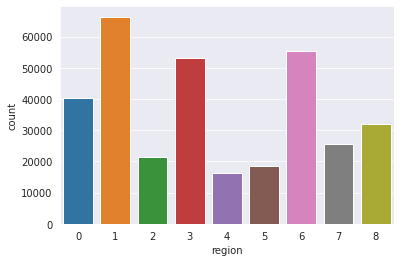

In [36]:
sns.countplot(df.region)

In [37]:
# Remove the state, yob, and region variables from the dataset: 
df = df.drop(columns=['state', 'yob'])

In [38]:
# II.1: Compute the mean of the `black` variable distributed on the `qob` variable.
# TIP: Use the groupby function
df['black'].groupby(df['qob']).mean()

qob
1    0.083836
2    0.083219
3    0.079430
4    0.080377
Name: black, dtype: float64

In [39]:
f_value, p_value = sp.stats.f_oneway(
    df.loc[df['qob'] == 1, 'black'].values,
    df.loc[df['qob'] == 2, 'black'].values,
    df.loc[df['qob'] == 3, 'black'].values,
    df.loc[df['qob'] == 4, 'black'].values)

print(f_value)
print(p_value)

5.094895785736597
0.0015890866336663227


In [40]:
# Compute the mean of the `black` variable distributed on the `region` variable.
# TIP: Use the groupby function
df['black'].groupby(df['region']).mean()

region
0    0.063282
1    0.074249
2    0.113553
3    0.083293
4    0.022906
5    0.026044
6    0.139506
7    0.035527
8    0.095247
Name: black, dtype: float64

In [41]:
df['region'].unique()

array([0, 2, 8, 4, 5, 6, 7, 1, 3])

In [42]:
f_value, p_value = sp.stats.f_oneway(
    df.loc[df['region'] == 0, 'black'].values,
    df.loc[df['region'] == 1, 'black'].values,
    df.loc[df['region'] == 2, 'black'].values,
    df.loc[df['region'] == 3, 'black'].values,
    df.loc[df['region'] == 4, 'black'].values,
    df.loc[df['region'] == 5, 'black'].values,
    df.loc[df['region'] == 6, 'black'].values,
    df.loc[df['region'] == 7, 'black'].values,
    df.loc[df['region'] == 8, 'black'].values  
)

print(f_value)
print(p_value)

675.422983010212
0.0


In [43]:
df_sample = df.sample(20000)

## Dealing with categorical variables
**‘dummy variable trap’** — when we use dummy variables to encode a categorical feature and do not omit the baseline level from the model. This results in a perfect correlation between the dummy variables and the constant term.

In [44]:
region = pd.get_dummies(df_sample.region, drop_first=True, prefix='region')

In [45]:
region

,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
220474,0,0,1,0,0,0,0,0
198650,0,0,0,0,0,1,0,0
321648,1,0,0,0,0,0,0,0
306,0,1,0,0,0,0,0,0
57332,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
69008,0,0,0,0,1,0,0,0
192812,0,0,0,0,0,0,0,1
45543,0,0,0,1,0,0,0,0
97302,0,0,0,0,0,0,0,0


In [46]:
X_1 = pd.concat([df_sample[['qob', 'black', 'married', 'smsa','edu']], region], axis=1)
X_1 = sm.add_constant(X_1)

In [47]:
X_1

,const,qob,black,married,smsa,edu,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
220474,1.0,1,0,1,1,12,0,0,1,0,0,0,0,0
198650,1.0,3,0,1,1,6,0,0,0,0,0,1,0,0
321648,1.0,2,0,1,1,10,1,0,0,0,0,0,0,0
306,1.0,3,1,0,1,12,0,1,0,0,0,0,0,0
57332,1.0,1,0,1,1,10,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69008,1.0,1,0,1,1,12,0,0,0,0,1,0,0,0
192812,1.0,3,0,1,1,11,0,0,0,0,0,0,0,1
45543,1.0,3,0,1,1,13,0,0,0,1,0,0,0,0
97302,1.0,2,0,1,1,10,0,0,0,0,0,0,0,0


### getting names right:

In [54]:
X_1_copy = X_1.sample(10)

In [56]:
X_1_copy.columns

Index(['const', 'qob', 'black', 'married', 'smsa', 'edu', 'region_1',
       'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'region_8'],
      dtype='object')

In [57]:
X_1_copy.columns = ['const', 'qob', 'black', 'married', 'smsa', 'edu', 'Aalborg',
       'Aarhus', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'region_8']

In [58]:
X_1_copy

,const,qob,black,married,smsa,edu,Aalborg,Aarhus,region_3,region_4,region_5,region_6,region_7,region_8
150826,1.0,4,0,1,0,15,0,0,0,0,0,0,0,0
21092,1.0,1,1,1,1,13,0,0,0,0,0,0,0,1
158799,1.0,4,0,1,0,15,0,0,0,0,0,1,0,0
46502,1.0,2,0,1,1,12,0,0,0,0,0,1,0,0
133889,1.0,2,0,1,1,16,0,0,0,0,0,0,0,1
184971,1.0,4,0,1,1,10,1,0,0,0,0,0,0,0
58231,1.0,2,0,0,1,16,0,0,0,0,0,1,0,0
65395,1.0,2,0,0,1,12,0,0,0,0,1,0,0,0
47575,1.0,1,0,1,1,12,0,0,0,0,0,1,0,0
39384,1.0,3,0,0,1,9,0,0,1,0,0,0,0,0


## What about variables with "text"?

In [48]:
df_txt = df.sample(15)

In [59]:
df_txt['smoker'] = 5*['0_Smoker','1_Non-smoker','2_Party-smoker']

In [60]:
# create dummy variables from categorical and get rid of the 1st for having a baseline in the OLS
# drop_first kicks out the one that comes first in the ABC

pd.get_dummies(df_txt.smoker, drop_first=True)

,1_Non-smoker,2_Party-smoker
113710,0,0
149096,1,0
164575,0,1
290373,0,0
16741,1,0
252519,0,1
103925,0,0
196071,1,0
318517,0,1
190205,0,0


## creating the final model inputs and estimating the model

In [61]:
y_1 = df_sample['logwage']

In [62]:
model_1 = sm.OLS(y_1, X_1)

In [63]:
model_1_res = model_1.fit()

In [64]:
model_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     311.3
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:53:34   Log-Likelihood:                -18568.
No. Observations:               20000   AIC:                         3.716e+04
Df Residuals:                   19986   BIC:                         3.727e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8395      0.028    174.838      0.000       4.785       4.894
qob           -0.0008      0.004     -0.198      0.843      -0.008       0.007
black         -0.2380      0.016    -14.772      0.000      -0.270      -0.206
married        0.2157      0.013     17.097      0.000       0.191       0.240
smsa           0.1788      0.011     15.566      0.000       0.156       0.201
edu            0.0641      0.001     47.568      0.000       0.061       0.067
region_1       0.0145      0.016      0.922      0.356      -0.016       0.045
region_2      -0.1749      0.021     -8.316      0.000      -0.216      -0.134
region_3      -0.0508      0.016     -3.094      0.002      -0.083      -0.019
region_4      -0.1349      0.024     -5.680      0.000      -0.181      -0.088
region_5      -0.1261      0.022     -5.648      0.000      -0.170      -0.082
region_6      -0.1483      0.016     -9.041      0.000      -0.180      -0.116
region_7      -0.1189      0.020     -5.979      0.000      -0.158      -0.080
region_8      -0.0862      0.019     -4.611      0.000      -0.123      -0.050
==============================================================================
Omnibus:                    12157.984   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           317264.041
Skew:                          -2.464   Prob(JB):                         0.00
Kurtosis:                      21.879   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Gauss-Markov Theorem

In the following a more thorough walktrough of testing OLS assumptions

## Linearity of the model

In the best case what we try to explain "is more or less linear". If that's not the case i.e. the explained reality is much more complex, then we will not be very successful explaining it with a linear model.

We can check that by plotting predictions vs observed values.
Predictions means here: "What outcome would the model guess for each sample"?

In the best case (the model is perfect and explains reality great) the predicted values would correlate perfectly with the observed ones and when plotted (scatterplot) align on one diagonal line.

Another useful check can be performed by looking at the distribution of the residuals and their mean value. If they are 

In [65]:
# use the fitted (trained) model to predict y_values
y_pred = model_1_res.predict(X_1)

In [66]:
# get residuals
resids_1 = model_1_res.resid

Text(0, 0.5, 'observed')

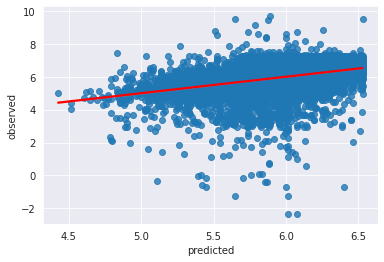

In [67]:
# plot predicted vs observed y values
fig = sns.regplot(x=y_pred, y=y_1, line_kws={'color': 'red'})
fig.set_xlabel("predicted", fontsize = 10)
fig.set_ylabel("observed", fontsize = 10)

Text(0, 0.5, 'residuals')

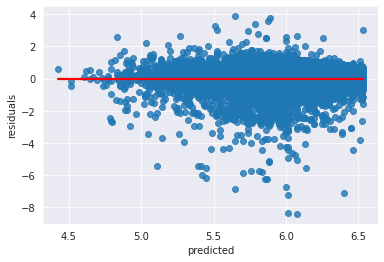

In [68]:
# plot predicted vs residuals y values
fig = sns.regplot(x=y_pred, y=resids_1, line_kws={'color': 'red'})
fig.set_xlabel("predicted", fontsize = 10)
fig.set_ylabel("residuals", fontsize = 10)

## Expectation (mean) of residuals is zero
We can also check whether the (expected) mean of the residuals = 0

In [69]:
model_1_res.resid.mean()

3.106808144082152e-14

## No (perfect) multicollinearity

the independant variables should be not perfectly correlated. To test for multicollinearity we usually use the VIF tes

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
variance_inflation_factor(X_1.values, 1)

1.0007477924767916

In [72]:
# putting it all together in one cell
vif = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]

pd.DataFrame({'vif': vif[1:]}, index=X_1.columns[1:]).T

,qob,black,married,smsa,edu,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8
vif,1.000748,1.051382,1.018882,1.059867,1.056429,2.132765,1.509313,1.935747,1.323215,1.365425,2.010501,1.549932,1.630159


Great! no multicollinearity!
Values over 10 would be problematic

## homoscedasticity of errors
the errors have equal variance — homoscedasticity of errors means that residuals ar not changing variance as a function of increasing fitted values (predictions). In the above plot (2nd plot) things seem more or less OK but we can also use a statistical test for thet e.g. the Bruesch-Pagan test (BP)

In [73]:
# here an example how to only get test values (you need your calculated residuals and the X variables - your exogenous vars. for that)
import statsmodels.stats.api as sms
sms.het_breuschpagan(resids_1, X_1)

(35.38851292260947,
 0.0007377682990715767,
 2.7251096453229704,
 0.0007335121440669104)

In [74]:
# we can put it all into a DataFrame for better display
bp_test = pd.DataFrame(sms.het_breuschpagan(resids_1, X_1), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

bp_test

,value
Lagrange multiplier statistic,35.388513
p-value,0.000738
f-value,2.725110
f p-value,0.000734


## getting several regression models ready for your report

In [75]:
!pip install stargazer -q

In [76]:
from stargazer.stargazer import Stargazer

In [77]:
# let's fit a model without the variable "edu" 
X_0 = pd.concat([df_sample[['qob', 'black', 'married', 'smsa']], region], axis=1)
X_0 = sm.add_constant(X_0)

In [78]:
model_0 = sm.OLS(y_1, X_0)

In [79]:
model_0_res = model_0.fit()

In [80]:
model_0_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logwage   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 29 Nov 2021   Prob (F-statistic):          3.46e-323
Time:                        11:07:07   Log-Likelihood:                -19641.
No. Observations:               20000   AIC:                         3.931e+04
Df Residuals:                   19987   BIC:                         3.941e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6613      0.023    248.112      0.000       5.617       5.706
qob           -0.0003      0.004     -0.069      0.945      -0.008       0.008
black         -0.3374      0.017    -20.018      0.000      -0.370      -0.304
married        0.2312      0.013     17.377      0.000       0.205       0.257
smsa           0.2376      0.012     19.718      0.000       0.214       0.261
region_1      -0.0564      0.017     -3.405      0.001      -0.089      -0.024
region_2      -0.2912      0.022    -13.212      0.000      -0.334      -0.248
region_3      -0.0966      0.017     -5.583      0.000      -0.131      -0.063
region_4      -0.1475      0.025     -5.886      0.000      -0.197      -0.098
region_5      -0.1669      0.024     -7.092      0.000      -0.213      -0.121
region_6      -0.2204      0.017    -12.789      0.000      -0.254      -0.187
region_7      -0.1694      0.021     -8.087      0.000      -0.210      -0.128
region_8      -0.1480      0.020     -7.522      0.000      -0.187      -0.109
==============================================================================
Omnibus:                    10731.978   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214277.493
Skew:                          -2.145   Prob(JB):                         0.00
Kurtosis:                      18.451   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model_overview = Stargazer([model_0_res, model_1_res])

In [82]:
model_overview

In [ ]:
from IPython.display import display, Math, Latex

In [ ]:
model_overview.render_latex()